In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
dataset=pd.read_csv("loan.csv")
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
dataset.shape

(614, 13)

In [6]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<h1> imputing missing values </h1>

In [8]:
dataset["Credit_History"]=dataset["Credit_History"].astype("object")

In [9]:
mode=dataset["Gender"].mode()[0]
dataset["Gender"]=dataset["Gender"].fillna(mode)
dataset["Gender"].isnull().sum()
catagorical=dataset.select_dtypes(include="object")
cols=catagorical.columns
cols

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
for col in cols:
    mode=dataset[col].mode()[0]
    catagorical[col]= catagorical[col].fillna(mode)
catagorical.isnull().sum()
dataset[['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status','Credit_History']]= catagorical[['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status','Credit_History']]
dataset.isnull().sum()

C:\Users\J11\AppData\Local\Temp\ipykernel_7608\1087200169.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  catagorical[col]= catagorical[col].fillna(mode)


Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
dataset["Credit_History"]=dataset["Credit_History"].astype("int64")

In [12]:
num=dataset.select_dtypes(include="float64")
num_cols=num.columns
num_cols

Index(['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], dtype='object')

In [13]:
for i in num_cols:
    mode=num[i].mode()[0]
    num[i]=num[i].fillna(mode)
num.isnull().sum()  

CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
dtype: int64

In [14]:
dataset[['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]=num[['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]

In [16]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<H1> ONE HOT ENCODING: </H1>

In [21]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(drop="first")
ohe.fit(dataset[["Gender"]])

OneHotEncoder(drop='first')

In [27]:
arr=ohe.transform(dataset[["Gender"]]).toarray()
gender_en=pd.DataFrame(arr, columns=["x"])
dataset["gender_male"]=gender_en["x"]


In [28]:
en_data=dataset[["Loan_Status","Education","Married"]]
ohe.fit(en_data)

OneHotEncoder(drop='first')

In [34]:
arr=ohe.transform(en_data).toarray()
datase=pd.DataFrame(arr, columns=["Loan_Status_yes","Education_grad","Married_yes"])
dataset[["Loan_Status_yes","Education_grad_no","Married_yes"]]=datase[["Loan_Status_yes","Education_grad","Married_yes"]]

<H1> ordianl ENCODING: </H1>

In [41]:
dicts={"Rural":1, "Urban":2, "Semiurban":3}
dataset["Property_Area_mapped"]=dataset["Property_Area"].map(dicts)
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,gender_en,gender_male,Loan_Status_yes,Education_grad,Married_yes,Education_grad_no,Property_Area_mapped
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1,Urban,Y,1.0,1.0,1.0,0.0,0.0,0.0,2
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N,1.0,1.0,0.0,0.0,1.0,0.0,1
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y,1.0,1.0,1.0,0.0,1.0,0.0,2
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,Y,1.0,1.0,1.0,1.0,1.0,1.0,2
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,Y,1.0,1.0,1.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1,Rural,Y,0.0,0.0,1.0,0.0,0.0,0.0,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1,Rural,Y,1.0,1.0,1.0,0.0,1.0,0.0,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1,Urban,Y,1.0,1.0,1.0,0.0,1.0,0.0,2
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1,Urban,Y,1.0,1.0,1.0,0.0,1.0,0.0,2


<h1> OUTLIER DETECTION AND HANDLING </h1>

In [65]:
numerical=dataset.select_dtypes(include="float64")
numerical.columns

Index(['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], dtype='object')

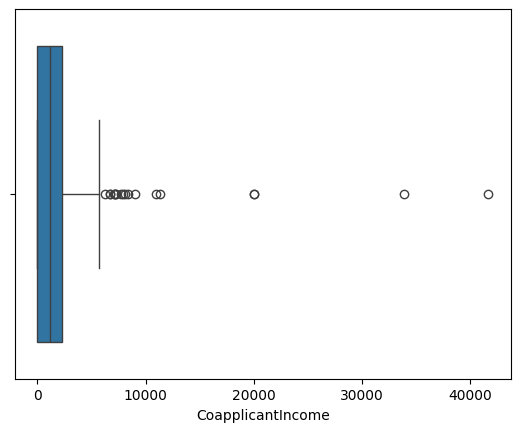

In [69]:
sns.boxplot(x="CoapplicantIncome", data=dataset)
plt.show()

In [106]:
_3rd_std_right=dataset["CoapplicantIncome"].mean() + (3* dataset["CoapplicantIncome"].std())
_3rd_std_left=dataset["CoapplicantIncome"].mean() - (3* dataset["CoapplicantIncome"].std())
cleaned_Coapp=dataset[dataset["CoapplicantIncome"]<=_3rd_std_right]


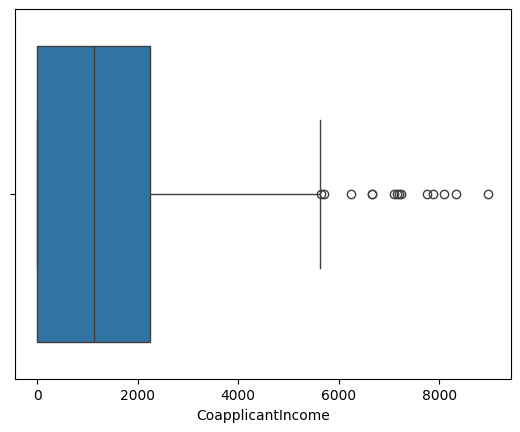

In [79]:
sns.boxplot(x="CoapplicantIncome", data=cleaned_Coapp)
plt.show()

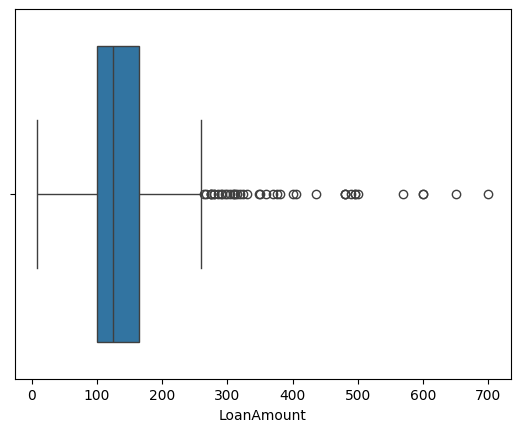

In [83]:
sns.boxplot(x="LoanAmount", data=dataset)
plt.show()

In [81]:
_3rd_std_right=dataset["LoanAmount"].mean() + (3* dataset["LoanAmount"].std())
_3rd_std_left=dataset["LoanAmount"].mean() - (3* dataset["LoanAmount"].std())
cleaned_loan_amount=dataset[dataset["LoanAmount"]<=_3rd_std_right]


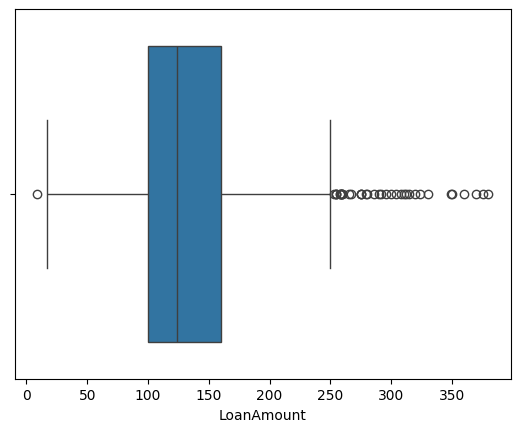

In [82]:
sns.boxplot(x="LoanAmount", data=cleaned_loan_amount)
plt.show()

<h1> DATA SCALING </h1>

In [88]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
ss.fit(cleaned_loan_amount[["LoanAmount"]])

StandardScaler()

In [92]:
# ss.transform(dataset[["ApplicantIncome"]])
dataset["LoanAmount"] = pd.DataFrame(ss.transform(cleaned_loan_amount[["LoanAmount"]]), columns=["x"])


In [93]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
ss.fit(dataset[["CoapplicantIncome"]])


StandardScaler()

In [96]:
dataset["CoapplicantIncome"] = pd.DataFrame(ss.transform(dataset[["CoapplicantIncome"]]), columns=["x"])

<h1> TRANSFORMATION </h1>

In [101]:
from sklearn.preprocessing import FunctionTransformer
ft=FunctionTransformer(func=np.log1p)
ft.fit(dataset[["ApplicantIncome"]])

FunctionTransformer(func=<ufunc 'log1p'>)

In [103]:
dataset["ApplicantIncome"]=ft.transform(dataset[["ApplicantIncome"]])


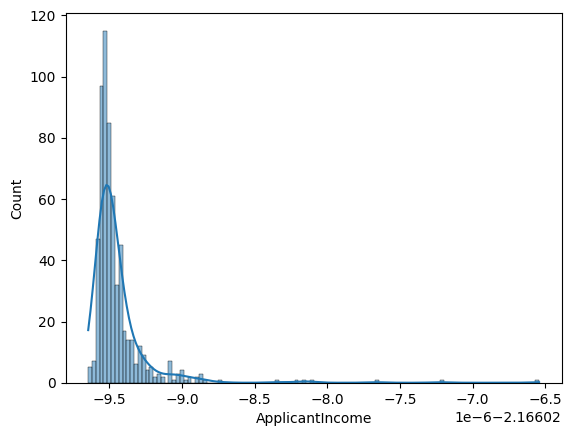

In [105]:
sns.histplot(dataset["ApplicantIncome"], kde=True)
plt.show()

In [137]:

dataset.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


<h1> onehotencoding </h1>

In [154]:
from sklearn.preprocessing import OneHotEncoder
# en_data=dataset[["Education","Self_Employed","Married","Gender"]]
# ohe=OneHotEncoder(drop="first")
# ohe.fit_transform(en_data).toarray()
ohe = OneHotEncoder(drop="first")

# Selecting columns to encode
en_data = dataset[["Education", "Self_Employed", "Married", "Gender"]]

# Fitting and transforming the data
encoded_array = ohe.fit_transform(en_data).toarray()
encoded_array

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])